# Plotting Confusion Matrix with Seaborn

## Use "heatmap"

In [1]:
# Note: we're not predicting anything
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")  # They give you a Pandas DataFrame

flights_long.head(7)
# flights_long.shape[0]  # 144 rows

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148


In [3]:
flights = flights_long.pivot("month", "year", "passengers")  # Pandas DataFrame

# flights.shape[0]  # 12 rows
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

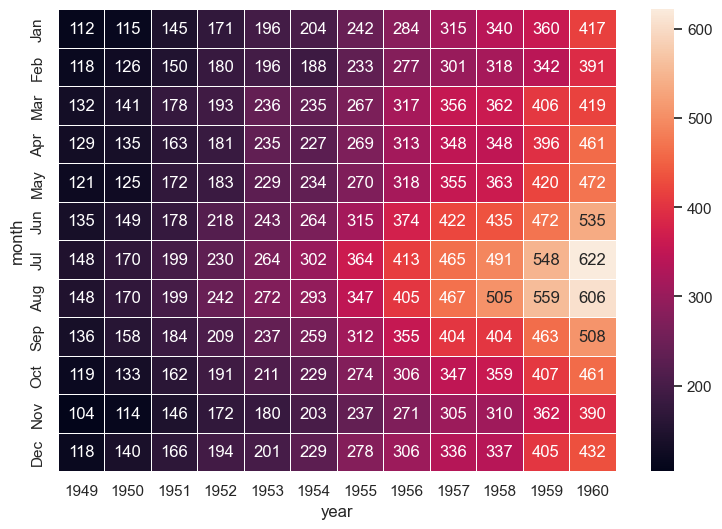

In [5]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))  # matplotlib figure, axes subplot
# f, ax  (<Figure size 900x600 with 1 Axes>, <AxesSubplot>)
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# Plotting Confusion Matrix with Matplotlib

## Manually coded heatmap

In [8]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
# Example data
y_true = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred = [0, 1, 1, 0, 2, 2, 0, 1, 2]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

cm  # numpy.ndarray

array([[3, 0, 0],
       [0, 2, 1],
       [0, 1, 2]])

In [15]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print("\nConfusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"

    thresh = cm.max() / 2.

    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Call the function `plot_confusion_matrix()` and pass the confusion matrix `cm` and the class labels as arguments.


Confusion matrix, without normalization
[[3 0 0]
 [0 2 1]
 [0 1 2]]

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]]




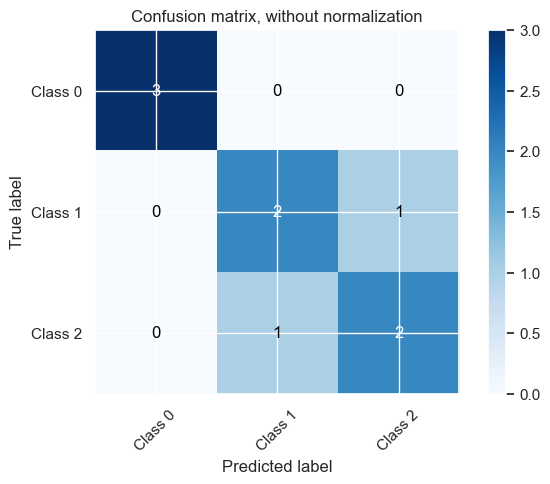

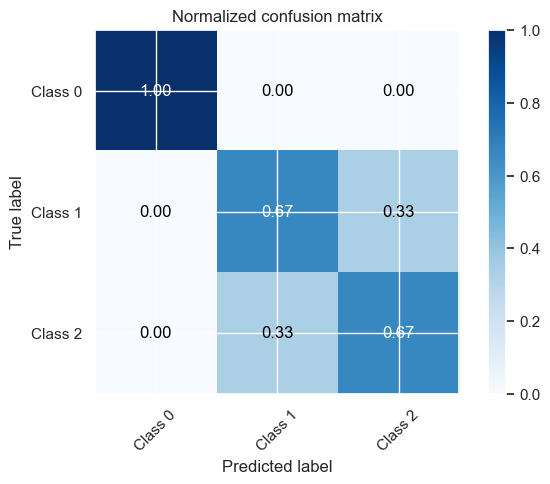

In [20]:
# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

print("\n")

plt.show()